Começamos importanto as bibliotecas necessarias.
Neste caso, apenas matplotlib para plotagem gráfica

In [87]:
import matplotlib.pyplot as plt  # Biblioteca para plotagem
import random

Agora suponha que foi realizado um experimento, e foram amostrados
valores y_i em diferentes instantes x_i, formando pares de (x_i,y_i)

In [88]:
pares_xy = [
    # (x_i, y_i),
    (3,   1),
    (21, 10),
    (22, 14),
    (34, 34),
    (54, 44),
    (34, 36),
    (55, 22),
    (67, 67),
    (89, 79),
    (99, 90)
    ]

Para simplificar as plotagens, podemos agrupar os valores de x e y separadamente

Text(0, 0.5, 'Valores Y')

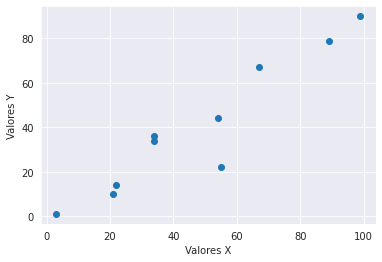

In [89]:
# Separa os x e os y em listas diferentes
x = [par[0] for par in pares_xy]
y = [par[1] for par in pares_xy]

plt.scatter(x, y)
plt.xlabel("Valores X")
plt.ylabel("Valores Y")

Visualmente, a função y(x) se assemelha a uma função linear descrita por y(x) = a*x + b

In [90]:
def funcao_linear(a, b, x):
    return a*x + b

Para descobrirmos a melhor aproximação de 'a' e 'b', precisamos de uma métrica de proximidade.
Uma das possíveis métricas é o método dos mínimos quadrados

In [91]:
def residuo_metodo_minimos_quadrados(y_medido, y_aproximado):
    residuo = 0
    for i in range(len(y_medido)):
        residuo += (y_medido[i]-y_aproximado[i])**2
    return residuo

Agora podemos testar iterativamente diferentes valores de 'a' e 'b', afim de minimizar o resíduo (loss) acima

Iteração 0: a=0.869, b=0.961, residuo 972.4
Iteração 1: a=0.868, b=0.961, residuo 971.0
Iteração 2: a=0.867, b=0.961, residuo 969.8
Iteração 3: a=0.867, b=0.961, residuo 968.6
Iteração 4: a=0.866, b=0.961, residuo 967.5
Iteração 5: a=0.865, b=0.961, residuo 966.4
Iteração 6: a=0.864, b=0.961, residuo 965.4
Iteração 7: a=0.864, b=0.961, residuo 964.5
Iteração 8: a=0.863, b=0.961, residuo 963.7
Iteração 9: a=0.862, b=0.961, residuo 962.8
Iteração 10: a=0.862, b=0.961, residuo 962.1
Iteração 11: a=0.861, b=0.961, residuo 961.4
Iteração 12: a=0.861, b=0.961, residuo 960.7
Iteração 13: a=0.860, b=0.961, residuo 960.1
Iteração 14: a=0.859, b=0.961, residuo 959.5
Iteração 15: a=0.859, b=0.961, residuo 958.9
Iteração 16: a=0.858, b=0.961, residuo 958.4
Iteração 17: a=0.858, b=0.961, residuo 957.9
Iteração 18: a=0.857, b=0.961, residuo 957.5
Iteração 19: a=0.857, b=0.961, residuo 957.0
Iteração 20: a=0.857, b=0.961, residuo 956.6
Iteração 21: a=0.856, b=0.961, residuo 956.3
Iteração 22: a=0.856

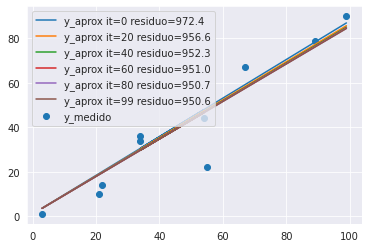

In [92]:
def gera_y_aproximado(a,b,x_medido):
    numeros = len(x_medido)
    y_aproximado = []
    # Para cada x_i, gera o valor aproximado de y_i(x_i) = a*x_i + b
    for i in range(numeros):
        y_aproximado.append(funcao_linear(a,b,x_medido[i]))
    return y_aproximado

def iteracao(a, b, x_medido, y_medido, taxa_aprendizagem, metodo="BGD"):

    if metodo == "BGD": # Batch Gradient Descent
        numeros = len(y_medido)
    elif metodo == "SGD": # Stochastic Gradient Descent
        numeros = 1
        indice = random.randint(0, len(y_medido)-1)
        x_medido = [x_medido[indice]]
        y_medido = [y_medido[indice]]
        print(indice)

    elif metodo == "MBGD":
        numeros = 5
        indices = set()
        while len(indices) < numeros:
            indices.add(random.randint(0, len(y_medido)-1))
        x_medido = [x_medido[indice] for indice in indices]
        y_medido = [y_medido[indice] for indice in indices]
        print(indices)
    y_aproximado = gera_y_aproximado(a,b,x_medido)

    # Calcula o ajuste (gradiente) para parâmetros 'a' e 'b'
    residuo_a = sum([(y_aproximado[i]-y_medido[i])*x_medido[i] for i in range(numeros)])/numeros
    residuo_b = sum([(y_aproximado[i]-y_medido[i]) for i in range(numeros)])/numeros

    # Retorna os valores de 'a' e 'b' ajustados
    a = a - taxa_aprendizagem*residuo_a
    b = b - taxa_aprendizagem*residuo_b

    return a,b

def minimizacao_residuo(x_medido, y_medido, taxa_aprendizagem, iteracoes=100, metodo="BGD", print_it=False):
    # Escolhemos 'a' e 'b' iniciais aleatoriamente
    import random
    a = random.random()
    b = random.random()

    # Depois executamos uma série de iterações,
    # ajustando os valores de 'a' e 'b' progressivamente
    for it in range(iteracoes):
        a, b = iteracao(a,b,x_medido,y_medido,taxa_aprendizagem, metodo)

        y_aproximado = gera_y_aproximado(a,b,x_medido)
        residuo = residuo_metodo_minimos_quadrados(y_medido, y_aproximado)
        if print_it:
            print("Iteração %d: a=%.3f, b=%.3f, residuo %.1f" % (it, a, b, residuo))

        if it % int(iteracoes/5) == 0 or it == (iteracoes-1):
            plt.plot(x_medido, y_aproximado, label="y_aprox it=%d residuo=%.1f" % (it, residuo))

    plt.scatter(x_medido, y_medido, label="y_medido")
    plt.legend()

minimizacao_residuo(x,y, 1e-5, iteracoes=100, print_it=True)

E o que acontece se fizermos um ajuste mais fino? Ou seja, com menor taxa de aprendizagem?
Precisaremos de mais iterações para convergir para o resultado final, porém conseguimos valores mais precisos.

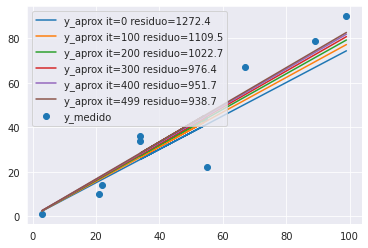

In [93]:
minimizacao_residuo(x,y, 1e-6, iteracoes=500)

E se quisermos acelerar o processo aumentando a taxa de aprendizado?
O ajuste pode ser grande demais, fazendo com que a busca da melhor aproximação divirja, se afaste, do resultado desejado.

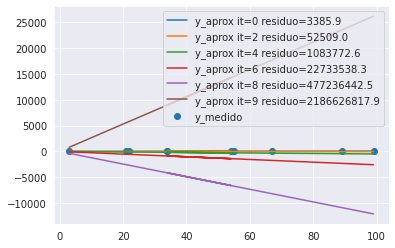

In [94]:
minimizacao_residuo(x, y, 1e-3, iteracoes=10)

Também podemos fazer o ajuste utilizando menos elementos por iteração.

{3, 4, 5, 8, 9}
Iteração 0: a=0.959, b=0.270, residuo 1282.0
{1, 2, 3, 6, 8}
Iteração 1: a=0.933, b=0.270, residuo 1128.6
{1, 3, 7, 8, 9}
Iteração 2: a=0.928, b=0.270, residuo 1104.9
{0, 1, 4, 6, 8}
Iteração 3: a=0.903, b=0.269, residuo 1007.3
{0, 1, 2, 4, 8}
Iteração 4: a=0.895, b=0.269, residuo 985.8
{1, 2, 6, 7, 9}
Iteração 5: a=0.882, b=0.269, residuo 957.4
{1, 2, 3, 5, 6}
Iteração 6: a=0.868, b=0.268, residuo 937.2
{2, 4, 5, 6, 7}
Iteração 7: a=0.859, b=0.268, residuo 931.4
{2, 3, 4, 5, 9}
Iteração 8: a=0.864, b=0.268, residuo 934.5
{1, 2, 3, 6, 8}
Iteração 9: a=0.850, b=0.268, residuo 930.8


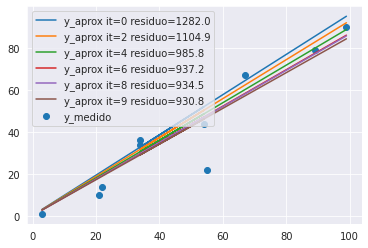

In [95]:
minimizacao_residuo(x,y, 5e-5, iteracoes=10, metodo="MBGD", print_it=True)

0
Iteração 0: a=0.450, b=0.219, residuo 6043.1
9
Iteração 1: a=0.674, b=0.221, residuo 1944.7
5
Iteração 2: a=0.696, b=0.222, residuo 1712.7
6
Iteração 3: a=0.651, b=0.221, residuo 2227.5
4
Iteração 4: a=0.674, b=0.221, residuo 1946.4
4
Iteração 5: a=0.694, b=0.221, residuo 1733.5
9
Iteração 6: a=0.798, b=0.223, residuo 1026.6
3
Iteração 7: a=0.810, b=0.223, residuo 991.1
2
Iteração 8: a=0.805, b=0.223, residuo 1004.1
1
Iteração 9: a=0.798, b=0.222, residuo 1028.8


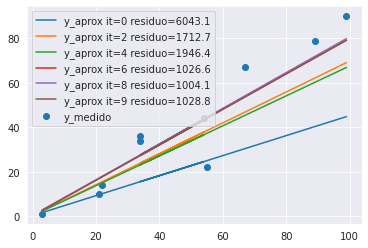

In [97]:
minimizacao_residuo(x,y, 5e-5, iteracoes=10, metodo="SGD", print_it=True)